In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
#allows to print the dataframe nicely
from IPython.core import display as ICD
!pip install plotly
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls
from scipy import stats

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
# import additional packages to insepct data and clean them
import pandas as pd
import os 
import random 
from zipfile import ZipFile
import datetime

In [3]:
# import helping functions from the implementation file
#from proj1_helpers import load_csv_data
from proj1_helpers import *
import implementations
from additional_implementations import *
import seaborn as sns

In [4]:
# import zipped files from the github repository
data_folder='./data/'
zip_file = ZipFile(data_folder+'all.zip')
# zip file creates a list of files with certain properties
zip_file.infolist()

[<ZipInfo filename='train.csv' compress_type=deflate file_size=48103379 compress_size=17670847>,
 <ZipInfo filename='test.csv' compress_type=deflate file_size=109335584 compress_size=40089137>,
 <ZipInfo filename='sample-submission.csv' compress_type=deflate file_size=5682394 compress_size=1263762>]

In [5]:
# now we want to access the 'filename' property in the zipfile variable
# and we create a dictionary of dataframe
dfs = {text_file.filename: pd.read_csv(zip_file.open(text_file.filename))
       for text_file in zip_file.infolist()
       if text_file.filename.endswith('.csv')}
df_train=dfs['train.csv']
df_test=dfs['test.csv']
df_sample_submission=dfs['sample-submission.csv']

In [6]:
df_train_gau=df_train.drop(columns=['Prediction', 'Id'])

In [7]:
df_train_gau[df_train_gau==-999.0]=0

In [8]:
y_train_gau=np.array(df_train['Prediction'])
y_train_gau[np.where(y_train_gau=='b')] = -1.
y_train_gau[np.where(y_train_gau=='s')] = 1.
y_train_gau=y_train_gau.astype('float')

In [9]:
tx_train_gau_polynomial=polynomial_features_simple(df_train_gau, 9)

0.2798623969647848

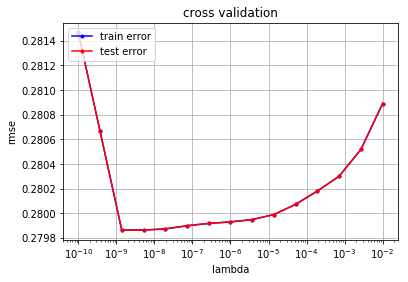

In [10]:
lambdas=np.logspace(-10,-2,15)
mses=[]
ws=[]
for lambda_ in lambdas:
    w,loss=implementations.ridge_regression(y_train_gau,tx_train_gau_polynomial,lambda_)
    mses.append(loss)
    ws.append(w)
cross_validation_visualization(lambdas, mses, mses)
w_final=ws[np.argmin(mses)]
mses[np.argmin(mses)]

In [11]:
y_pred=predict_labels(w_final,tx_train_gau_polynomial)
list(y_pred*y_train_gau).count(1.)/len(tx_train_gau_polynomial)


0.812976

In [12]:
df_test_gau=df_test

In [13]:
df_test_gau=df_test_gau.drop(columns=['Id', 'Prediction'])

In [14]:
df_test_gau[df_test_gau==-999.0]=0

In [15]:
tx_test_gau_polynomial=polynomial_features_simple(df_test_gau,9)

In [16]:
tx_test=tx_test_gau_polynomial
y_pred=predict_labels(w_final,tx_test)
create_csv_submission(df_test['Id'], y_pred, 'trial_ridge_polynomial_gau_basic')

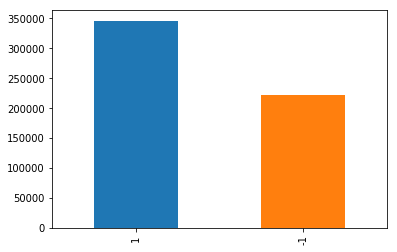

In [18]:
gau_std=pd.read_csv('trial_ridge_polynomial_gau')
gau_basic=pd.read_csv('trial_ridge_polynomial_gau_basic')

check=gau_basic['Prediction']*gau_std['Prediction']
check.value_counts().plot(kind='bar')